In [19]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pylab as plt
y, sr = librosa.load("speech1.wav") # Loading the Audio File
y

array([ 0.        ,  0.        ,  0.        , ..., -0.02045225,
       -0.02391018, -0.01801157], dtype=float32)

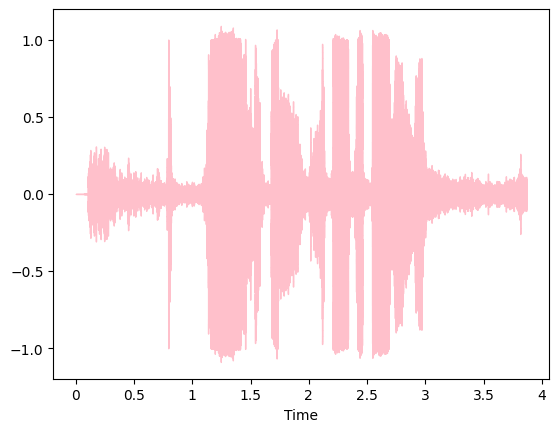

In [2]:
librosa.display.waveshow(y,color='pink') #Displaying the Audio Track

In [3]:
#A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the
#amplitude part of the spectral components and observe it. Use numpy.fft.ifft() to inverse
#transform the frequency spectrum to time domain signal.

fft=np.fft.fft(y)
fft

array([ 233.30928652-8.88178420e-15j, -120.87790533-2.23615605e+02j,
       -155.80314246+1.91852809e+02j, ...,  309.02044945-1.26316953e+02j,
       -155.80314246-1.91852809e+02j, -120.87790533+2.23615605e+02j])

[233.30928652 254.19560705 247.14797115 ... 333.84069662 247.14797115
 254.19560705]


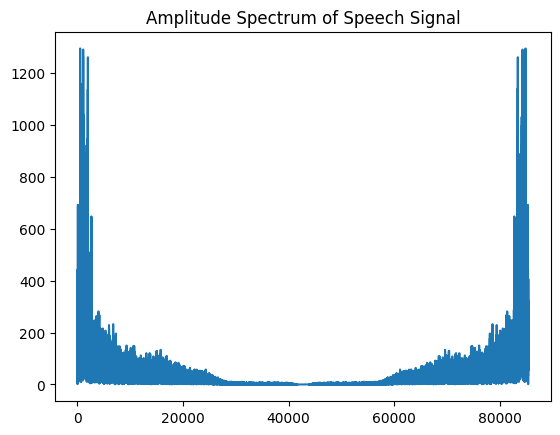

In [4]:
amplitude = np.abs(fft)
print(amplitude)
plt.plot(amplitude)
plt.title('Amplitude Spectrum of Speech Signal')
plt.show()

[ 9.02056208e-17+1.66533454e-16j -1.52654644e-16-2.77611928e-17j
 -1.11038642e-16+1.11005960e-16j ... -2.04522479e-02-4.27717757e-16j
 -2.39101760e-02+2.69720701e-17j -1.80115663e-02+5.49435333e-17j]


C:\Users\duvar\AppData\Roaming\Python\Python39\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\duvar\AppData\Roaming\Python\Python39\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


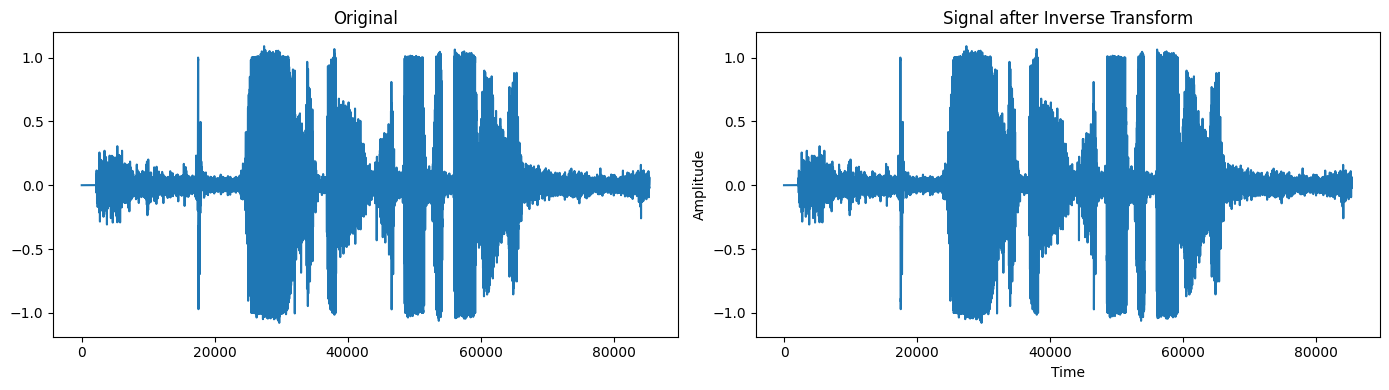

In [6]:
ifft=np.fft.ifft(fft)
print(ifft)
plt.figure(figsize=(14,4))
plt.subplot(1, 2, 1)
plt.plot(y)
plt.title('Original')
# Signal obtained after inverse transform
plt.subplot(1, 2, 2)
plt.plot(ifft)
plt.title('Signal after Inverse Transform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

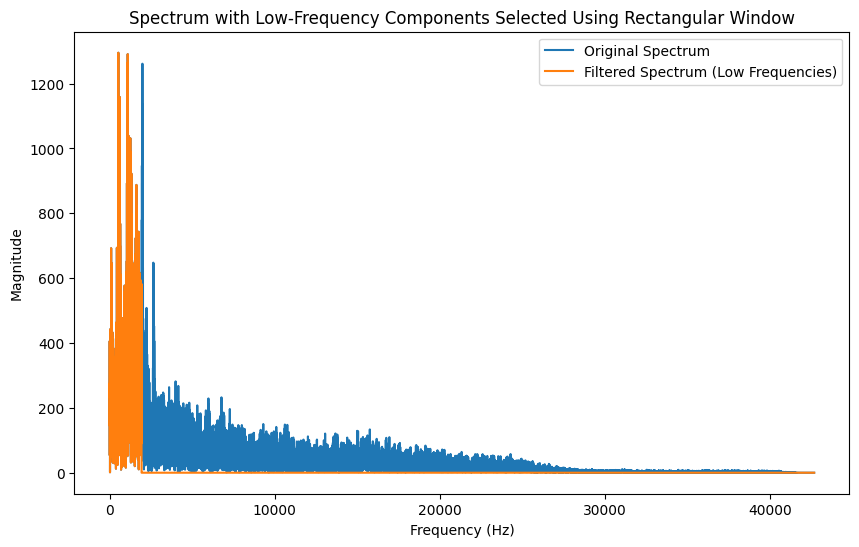

In [28]:
#A2. Use a rectangular window to select the low frequency components from your spectrum. Inverse
#transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high
#pass frequencies of spectrum.
low_freq_cutoff = 500  # Set your desired low-frequency cutoff in Hz
rectangular_window = np.zeros_like(fft)
rectangular_window[:int(low_freq_cutoff * len(fft) / sr)] = 1
filtered_spectrum = fft * rectangular_window
plt.figure(figsize=(10, 6))
plt.plot(np.abs(fft[:len(fft)//2]), label='Original Spectrum')
plt.plot(np.abs(filtered_spectrum[:len(filtered_spectrum)//2]), label='Filtered Spectrum (Low Frequencies)')
plt.title('Spectrum with Low-Frequency Components Selected Using Rectangular Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

In [22]:
filtered_signal = np.fft.ifft(filtered_spectrum)
print(filtered_signal)
from IPython.display import Audio
Audio(data=filtered_signal, rate=sr)

[0.00164761+0.00709403j 0.00134912+0.00683967j 0.00106294+0.00658602j ...
 0.00264232+0.007872j   0.00229122+0.00760962j 0.00196071+0.0073504j ]


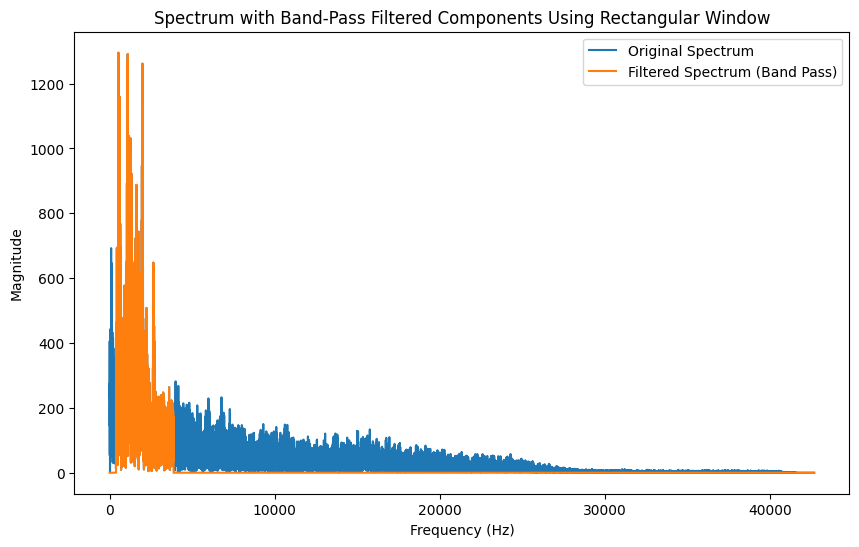

In [23]:
low_freq_cutoff_bp = 100  # Set your desired low-frequency cutoff in Hz
high_freq_cutoff_bp = 1000  # Set your desired high-frequency cutoff in Hz
band_pass_window = np.zeros_like(fft)
band_pass_window[int(low_freq_cutoff_bp * len(fft) / sr):int(high_freq_cutoff_bp * len(fft) / sr)] = 1
filtered_spectrum_bp = fft * band_pass_window

# Plot the original and band-pass filtered spectra
plt.figure(figsize=(10, 6))
plt.plot(np.abs(fft[:len(fft)//2]), label='Original Spectrum')
plt.plot(np.abs(filtered_spectrum_bp[:len(filtered_spectrum_bp)//2]), label='Filtered Spectrum (Band Pass)')
plt.title('Spectrum with Band-Pass Filtered Components Using Rectangular Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

900


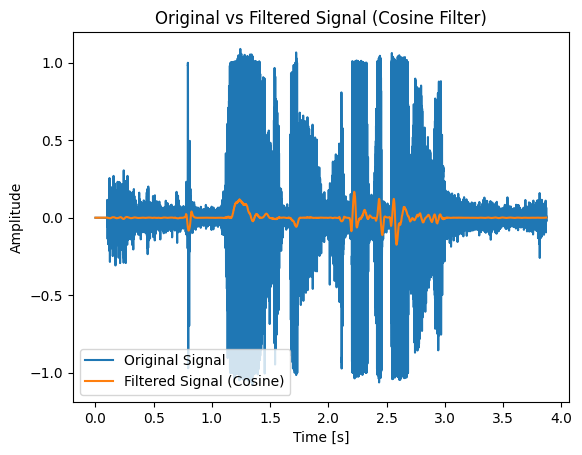

In [29]:
#A2. Repeat A2 with other filter types such as Cosine / Gausian filters.
from scipy.signal import convolve

time= 40e-3
samplingrate=22500
window_length = int(time*samplingrate)
print(window_length)
arr3=np.arange(0, len(y)/sr,1/sr)
cosine_filter = np.cos(np.linspace(-np.pi/2, np.pi/2, window_length))

# Normalize the filter kernel
cosine_filter /= np.sum(cosine_filter)

# Apply the cosine filter to the signal using convolution
filtered_signal_cosine = convolve(y, cosine_filter, mode='same')

# Plot the original and filtered signals
plt.figure()
plt.plot(arr3,y, label='Original Signal')
plt.plot(arr3,filtered_signal_cosine, label='Filtered Signal (Cosine)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Original vs Filtered Signal (Cosine Filter)')
plt.legend()
plt.show()

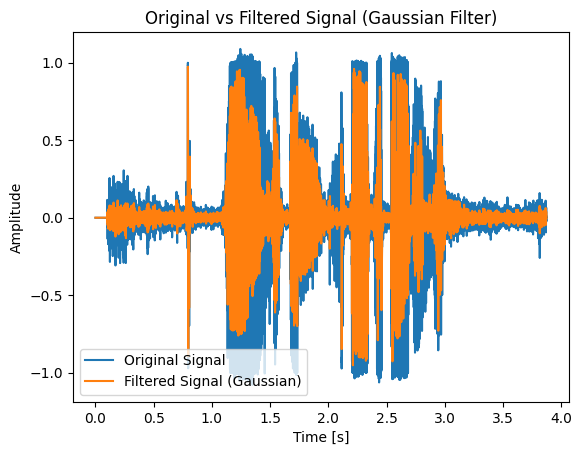

In [27]:
from scipy.ndimage import gaussian_filter1d

# Appling the Gaussian filter to the signal
sigma = 10  
gaussian_signal = gaussian_filter1d(y, sigma)
plt.figure()
plt.plot(arr3,y, label='Original Signal')
plt.plot(arr3,gaussian_signal, label='Filtered Signal (Gaussian)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Original vs Filtered Signal (Gaussian Filter)')
plt.legend()

plt.show()